In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload our Dataset

In [2]:
cars_data = pd.read_csv("Car_sales.csv")
cars_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
cars_data.shape

(157, 16)

# Data Cleaning

In [4]:
cars_data.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [5]:
print("mean : ",cars_data['__year_resale_value'].mean())
print("median : ",cars_data['__year_resale_value'].median())

mean :  18.07297520661157
median :  14.18


In [6]:
cars_data['__year_resale_value'].fillna(cars_data['__year_resale_value'].median(),inplace=True)
cars_data.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

In [7]:
threhold = len(cars_data) * 0.05
print("threhold : ",threhold)
cols_to_drop = cars_data.columns[cars_data.isna().sum() <= threhold ]
cars_data.dropna(subset=cols_to_drop,inplace=True)
cars_data.isna().sum()

threhold :  7.8500000000000005


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [8]:
cars_data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,17.144671,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,10.301344,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,12.527500,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,14.180000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,17.806250,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


# Finging Realtionship in data

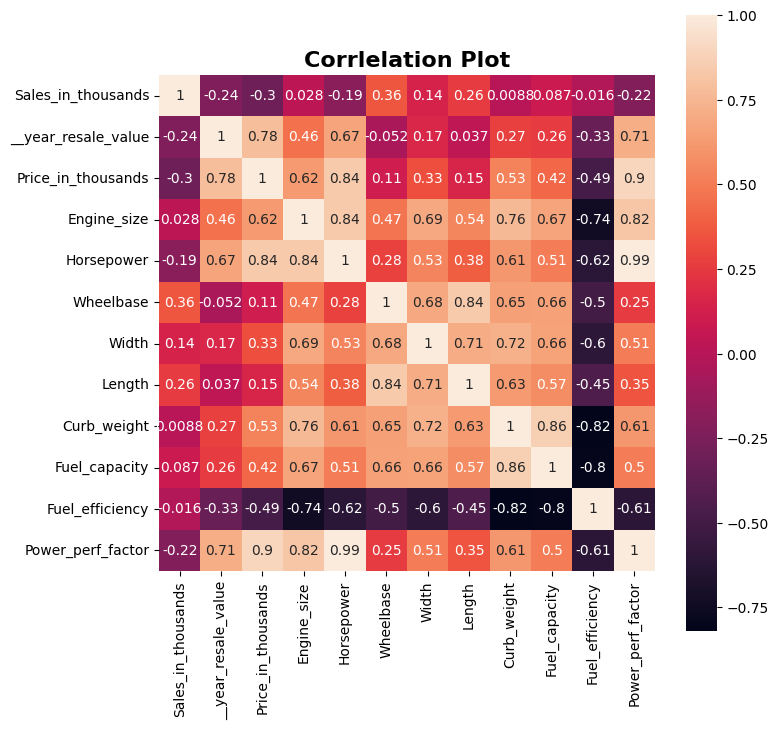

In [9]:
corr = cars_data.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,square=True)
plt.title("Corrlelation Plot",fontsize=16,fontweight="bold")
plt.show()

# Analysing The Manufacturer's sales 

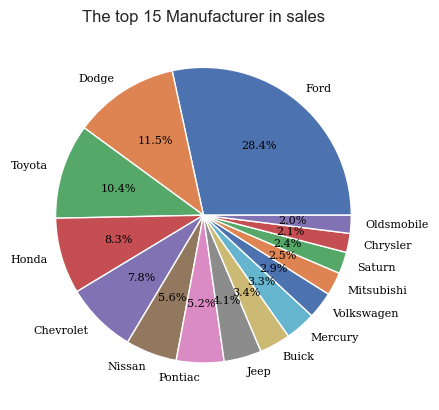

In [10]:
man_sales = cars_data.groupby('Manufacturer')['Sales_in_thousands'].sum().nlargest(15)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 8,
        'rotation' : 0,
        }
sns.set_theme(style="darkgrid")
plt.pie(man_sales,labels=man_sales.index,autopct='%1.1f%%',textprops=font)
plt.title('The top 15 Manufacturer in sales')
plt.show()

# Year Resale Value by Manufacturer

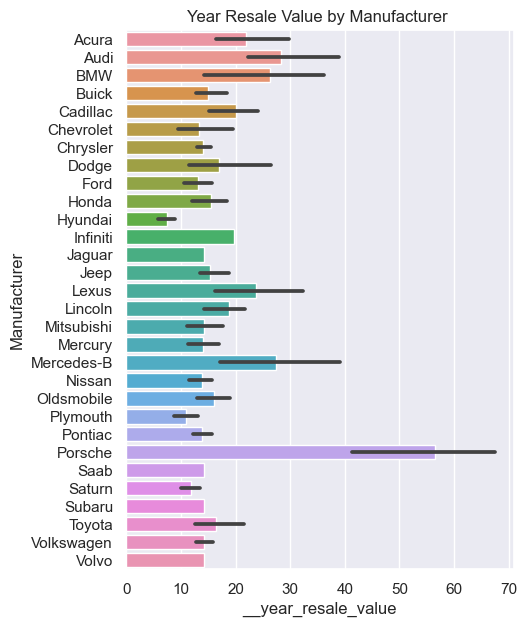

In [11]:
plt.figure(figsize=(5, 7))
sns.barplot(data=cars_data, x="__year_resale_value",y="Manufacturer")
plt.title('Year Resale Value by Manufacturer ')
plt.ylabel("Manufacturer")
plt.show()

# Analysing the Vehicle type

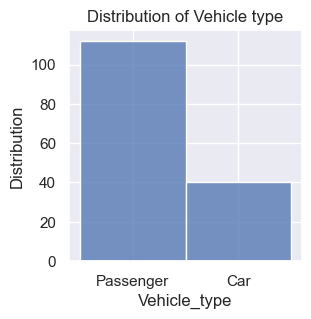

In [12]:
plt.figure(figsize=(3, 3))
sns.histplot(data=cars_data, x="Vehicle_type")
plt.title('Distribution of Vehicle type')
plt.ylabel("Distribution")
plt.show()

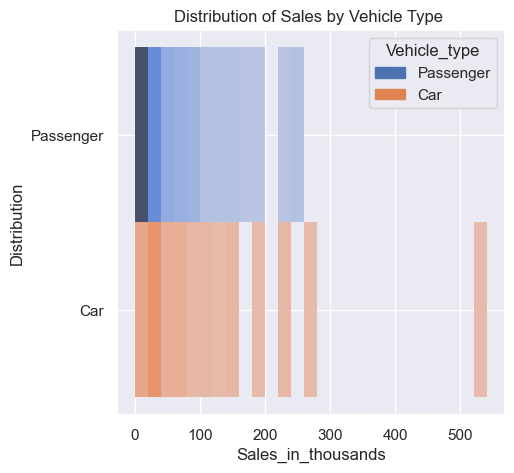

In [13]:
plt.figure(figsize=(5, 5))
sns.histplot(data=cars_data, x="Sales_in_thousands",y="Vehicle_type",hue="Vehicle_type")
plt.title('Distribution of Sales by Vehicle Type ')
plt.ylabel("Distribution")
plt.show()

# finding the feature has more impact on car sales

## Distribution Analysis

In [14]:
df_num = cars_data.select_dtypes(include = ['float64', 'int64'])
print(df_num.columns)
df_num = df_num.drop(columns=["__year_resale_value","Price_in_thousands"])
print(df_num.columns)

Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')
Index(['Sales_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')


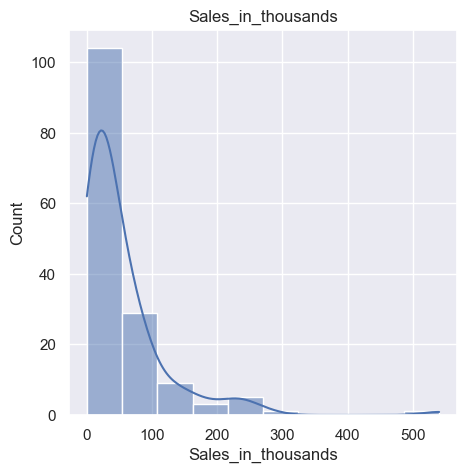

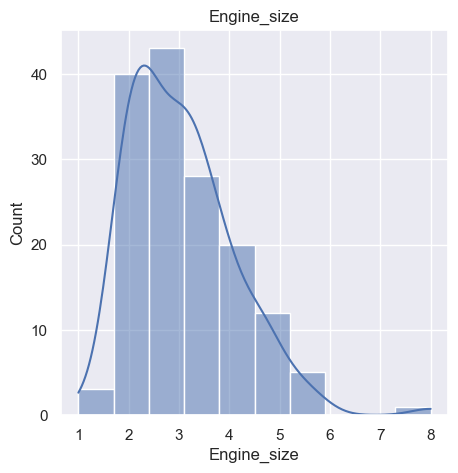

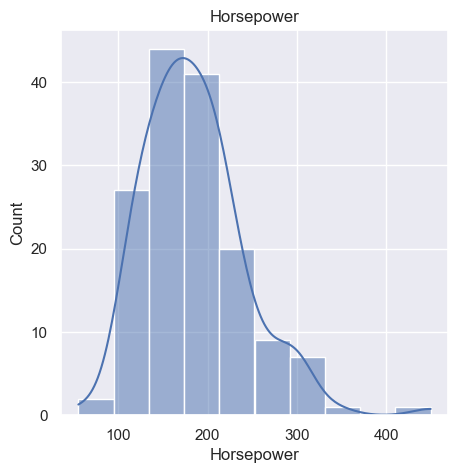

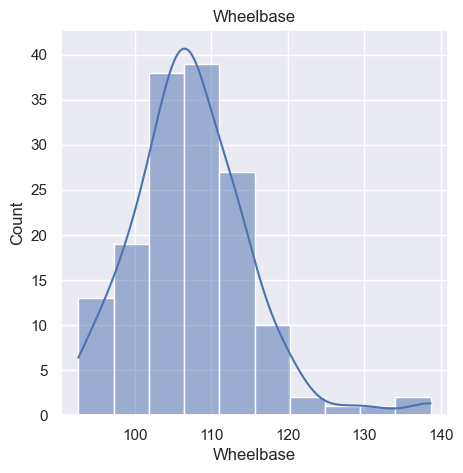

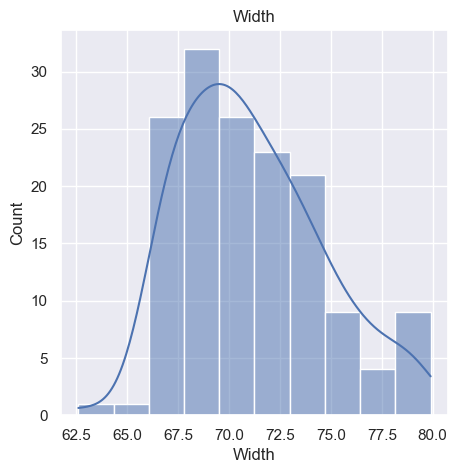

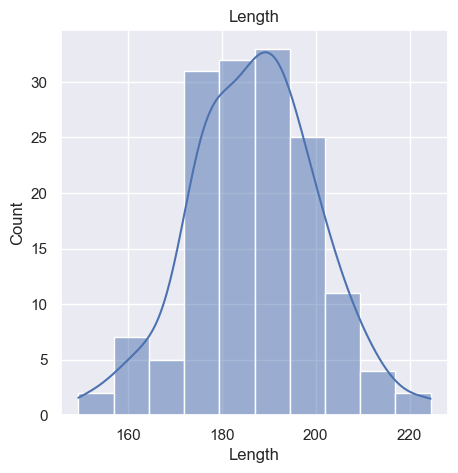

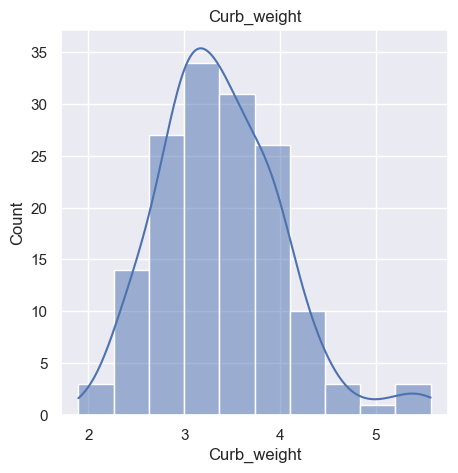

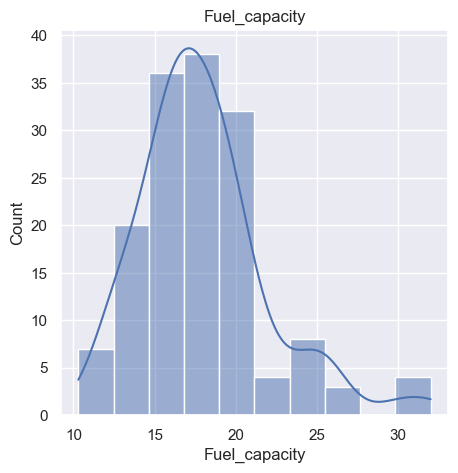

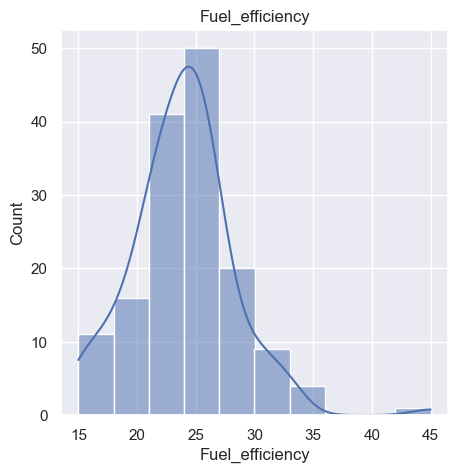

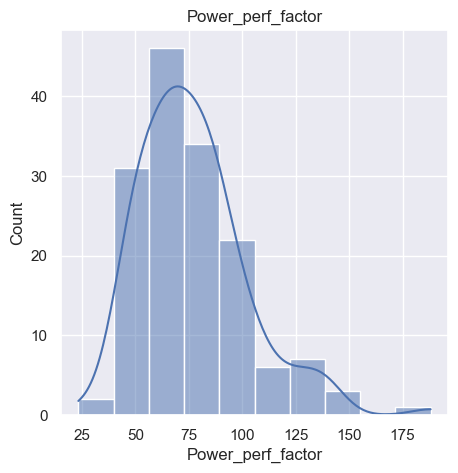

In [15]:
def plot():
    for p in df_num.columns:
        plt.figure(figsize=(5, 5))
        sns.histplot(df_num[p], bins=10,kde=True)
        plt.title(p)
        plt.show()
plot()

## Bivariate Analysis

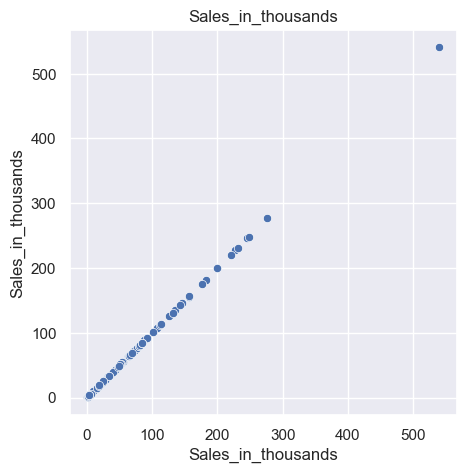

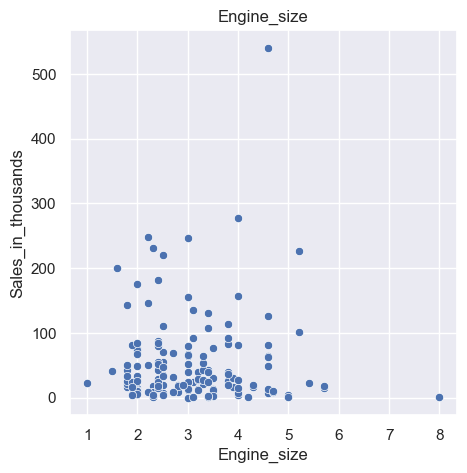

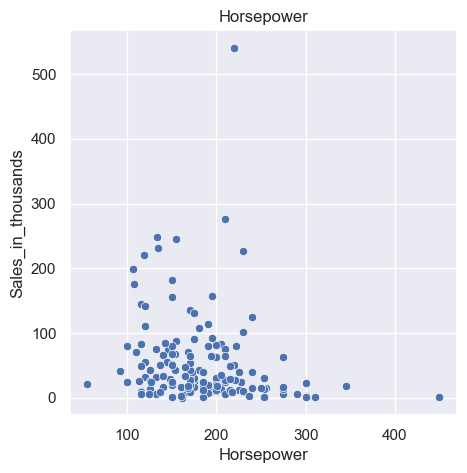

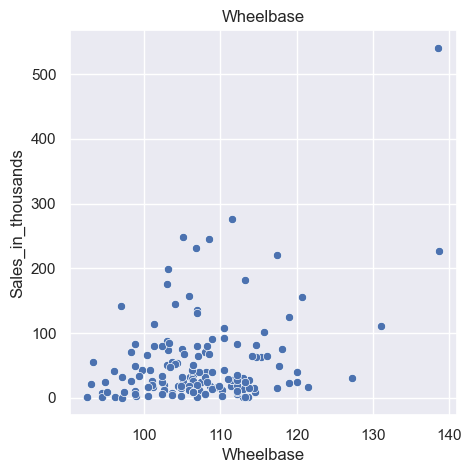

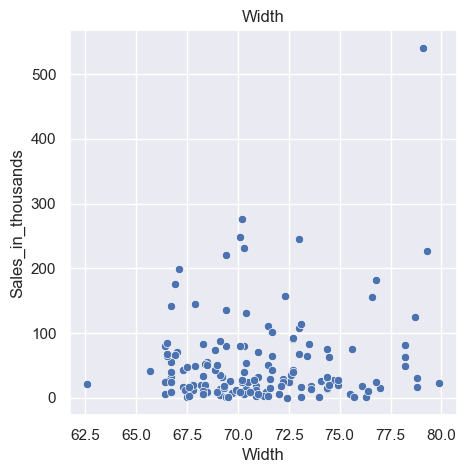

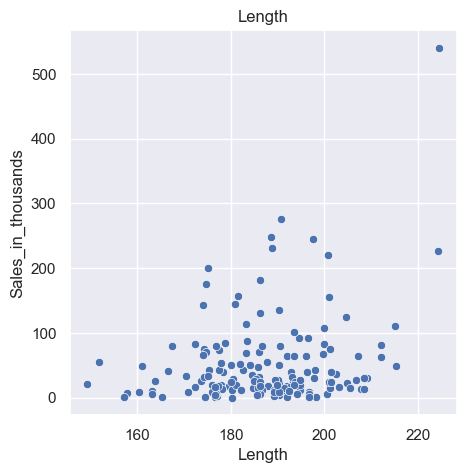

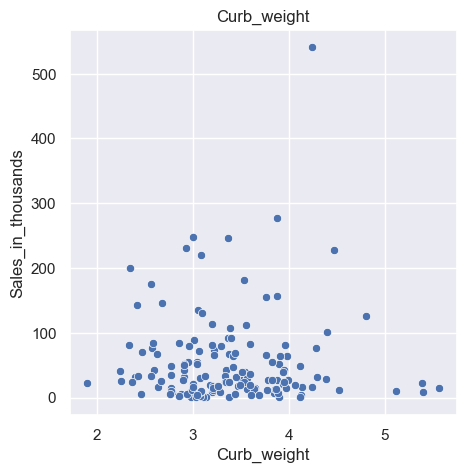

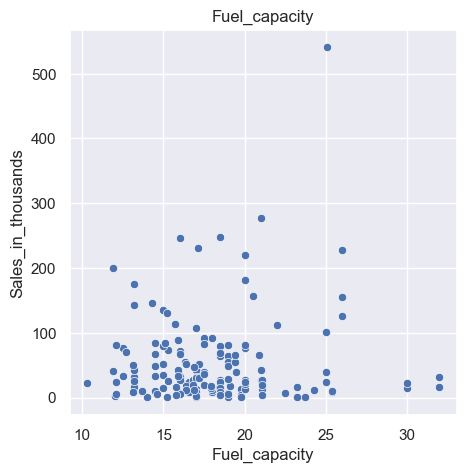

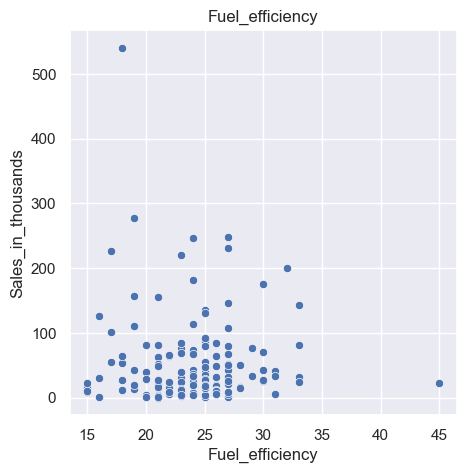

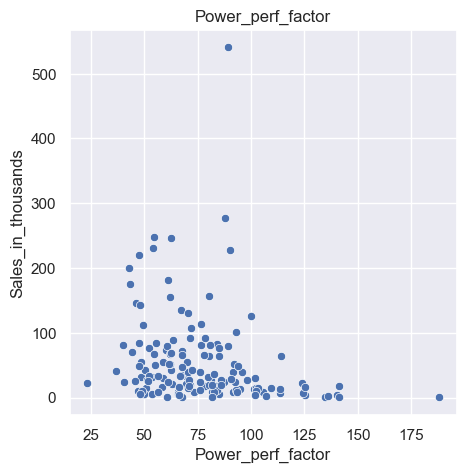

In [16]:
def Biplot():
    for u in df_num.columns:
        plt.figure(figsize=(5, 5))
        sns.scatterplot(x = u , y="Sales_in_thousands" , data = df_num )
        plt.title(u)
        plt.show()
Biplot()